In [90]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Cargamos los dataset para las diferentes redes

In [91]:
(ds_train, ds_test), ds_info = tfds.load('mnist', split=['train', 'test'], shuffle_files=True, as_supervised=True, with_info=True )

(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Preparación de datos para DNN



In [92]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

In [93]:
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [94]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

##Probamos diferentes formas de DNN, sin capa oculta, con capa oculta de 32 neuronas y con 256 neuronas

In [95]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)
precision = model.fit(
    ds_train,
    epochs=10,
    batch_size=5,
    validation_data=ds_test,
).history['accuracy']

Epoch 1/10
469/469 [==============================] - 9s 5ms/step - loss: 0.6864 - accuracy: 0.8299 - val_loss: 0.3877 - val_accuracy: 0.9009
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3635 - accuracy: 0.9021 - val_loss: 0.3238 - val_accuracy: 0.9121
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3203 - accuracy: 0.9123 - val_loss: 0.2962 - val_accuracy: 0.9167
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2996 - accuracy: 0.9174 - val_loss: 0.2851 - val_accuracy: 0.9202
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2879 - accuracy: 0.9204 - val_loss: 0.2795 - val_accuracy: 0.9225
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2797 - accuracy: 0.9224 - val_loss: 0.2753 - val_accuracy: 0.9229
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2738 - accuracy: 0.9236 - val_loss: 0.2715 - val_accuracy: 0.9247
Epoch 

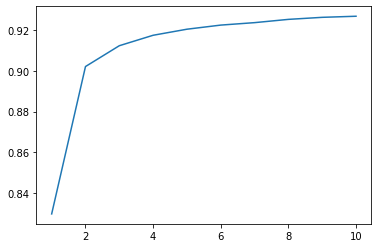

In [96]:
sns.lineplot(x=[1,2,3,4,5,6,7,8,9,10], y=precision)

In [97]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(32,activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)
precision = model.fit(
    ds_train,
    epochs=10,
    batch_size=5,
    validation_data=ds_test,
).history['accuracy']

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.5130 - accuracy: 0.8596 - val_loss: 0.2764 - val_accuracy: 0.9227
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2500 - accuracy: 0.9299 - val_loss: 0.2238 - val_accuracy: 0.9373
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2029 - accuracy: 0.9427 - val_loss: 0.1898 - val_accuracy: 0.9459
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1745 - accuracy: 0.9509 - val_loss: 0.1708 - val_accuracy: 0.9497
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1541 - accuracy: 0.9555 - val_loss: 0.1525 - val_accuracy: 0.9551
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1398 - accuracy: 0.9596 - val_loss: 0.1486 - val_accuracy: 0.9553
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1269 - accuracy: 0.9634 - val_loss: 0.1382 - val_accuracy: 0.9601
Epoch 

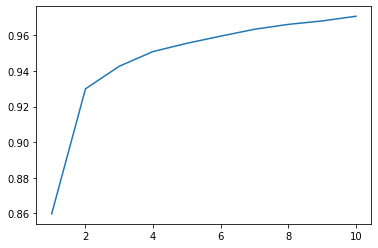

In [98]:
sns.lineplot(x=[1,2,3,4,5,6,7,8,9,10], y=precision)

In [99]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256,activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)
precision = model.fit(
    ds_train,
    epochs=10,
    batch_size=5,
    validation_data=ds_test,
).history['accuracy']

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3106 - accuracy: 0.9125 - val_loss: 0.1615 - val_accuracy: 0.9517
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1364 - accuracy: 0.9604 - val_loss: 0.1101 - val_accuracy: 0.9671
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0929 - accuracy: 0.9740 - val_loss: 0.0935 - val_accuracy: 0.9707
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0686 - accuracy: 0.9800 - val_loss: 0.0800 - val_accuracy: 0.9746
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0535 - accuracy: 0.9843 - val_loss: 0.0736 - val_accuracy: 0.9772
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0417 - accuracy: 0.9881 - val_loss: 0.0704 - val_accuracy: 0.9783
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0331 - accuracy: 0.9909 - val_loss: 0.0623 - val_accuracy: 0.9810
Epoch 

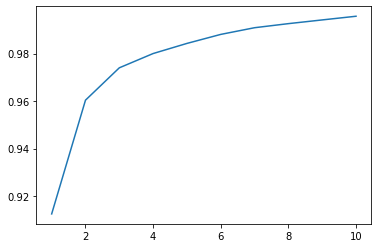

In [100]:
sns.lineplot(x=[1,2,3,4,5,6,7,8,9,10], y=precision)

#Preparacion de datos para CNN

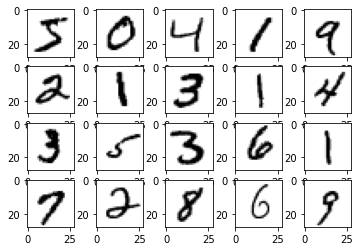

In [101]:
fig = plt.figure()
for i in range(1,21):
  ax =  fig.add_subplot(4,5,i)
  ax.imshow(X_train[i-1], cmap='binary')

In [102]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')
X_test  = X_test.reshape(-1,  28, 28, 1).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

y_train = tf.keras.utils.to_categorical(y_train)
y_test =  tf.keras.utils.to_categorical(y_test)
num_classes = y_test.shape[1]

##Probamos el CNN con 64 filtros con un kernel de 3x3 y un pooling de 2x2

In [103]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

precision = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=5,
    validation_data=(X_test,y_test)
).history['accuracy']

Epoch 1/10
12000/12000 [==============================] - 245s 20ms/step - loss: 0.1175 - accuracy: 0.9645 - val_loss: 0.0533 - val_accuracy: 0.9827
Epoch 2/10
12000/12000 [==============================] - 242s 20ms/step - loss: 0.0437 - accuracy: 0.9864 - val_loss: 0.0441 - val_accuracy: 0.9856
Epoch 3/10
12000/12000 [==============================] - 240s 20ms/step - loss: 0.0254 - accuracy: 0.9918 - val_loss: 0.0585 - val_accuracy: 0.9841
Epoch 4/10
12000/12000 [==============================] - 240s 20ms/step - loss: 0.0168 - accuracy: 0.9943 - val_loss: 0.0472 - val_accuracy: 0.9858
Epoch 5/10
12000/12000 [==============================] - 241s 20ms/step - loss: 0.0107 - accuracy: 0.9964 - val_loss: 0.0591 - val_accuracy: 0.9860
Epoch 6/10
12000/12000 [==============================] - 243s 20ms/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.0808 - val_accuracy: 0.9845
Epoch 7/10
12000/12000 [==============================] - 244s 20ms/step - loss: 0.0068 - accuracy: 0.9979

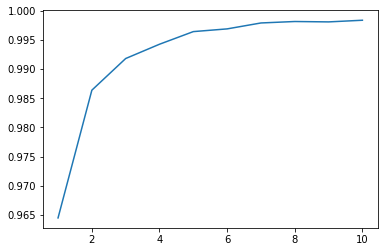

In [104]:
sns.lineplot(x=[1,2,3,4,5,6,7,8,9,10], y=precision)

Como podemos observar las redes convolucionales sacan mejor precisión que las densas a cambio de un análisis mas exhaustivo y más tiempo de ejecucción.
Ha tardado 40 min con ejecución TPU.